In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/vertebrate(4).csv", header='infer')

In [ ]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [ ]:
data['Class']=data['Class'].replace(['reptiles', 'fishes', 'amphibians', 'birds'], 'non-mammals')

In [ ]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [ ]:
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [ ]:
from sklearn import tree

In [ ]:
y=data['Class']

In [ ]:
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [ ]:
x=data.drop(['Name', 'Class'],axis=1)

In [ ]:
x

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf=clf.fit(x,y)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data=tree.export_graphviz(clf, feature_names=x.columns,
                              class_names=['mammals', 'non-mammals'],
                              filled=True,out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = non-mammals", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = mammals", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

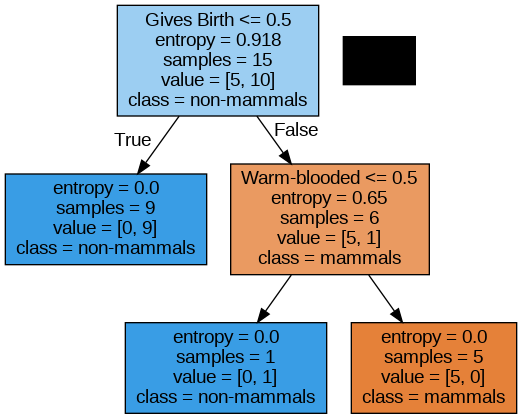

In [ ]:
graph

Image(graph.create_png())

In [ ]:
testData=[['gila monister',0,0,0,0,1,1, 'non-mammals'],['platypus',1,0,0,0,1,1, 'mammals'],['owl',1,0,0,1,1,0, 'non-mammals'],['dolphin',1,1,1,0,0,0, 'mammals']]

In [ ]:
testData

[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mammals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [ ]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [ ]:
testData=pd.DataFrame(testData, columns=data.columns)

In [ ]:
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [ ]:
testY=testData['Class']

In [ ]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [ ]:
testX=testData.drop(['Name', 'Class'],axis=1)

In [ ]:
testX

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [ ]:
predY=clf.predict(testX)

In [ ]:
predY

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [ ]:
3/4*100

75.0

In [ ]:
predictions=pd.concat([testData['Name'], testData['Class'],pd.Series(predY, name='Predicted Class')], axis=1)

In [ ]:
predictions

,Name,Class,Predicted Class
0,gila monister,non-mammals,non-mammals
1,platypus,mammals,non-mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


In [ ]:
3/4*100

75.0

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testY, predY)

0.75

Model Overfitting

In [ ]:
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [ ]:
maxDepths

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from numpy.random import random

In [ ]:
%matplotlib inline

In [ ]:
N=1500

In [ ]:
mean1=[6,14]

In [ ]:
mean2=[10,16]

In [ ]:
mean3=[14,14]

In [ ]:
cov=[[3.5,0], [0,3.5]]

In [ ]:
np.random.seed(50)

In [ ]:
# prompt: X.np.random.multivariate_normal(mean1, cov, int(N/6))

import numpy as np
X=np.random.multivariate_normal(mean1, cov, int(N/6))


In [ ]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       [ 4.5398758 , 16.00228759],
       [ 3.60105022, 11.51651438],
       [ 6.23635608, 15.61301674],
       [ 7.3034755 , 13.37408585],
       [ 4.13379962, 16.99128351],
       [12.20006725, 15.84794932],
       [ 6.23173255, 15.38962423],
       [ 5.26297609, 14.27709932],
       [ 5.22877996, 13.69932965],
       [ 6.26103949, 14.53406429],
       [ 5.47380699, 17.2008145 ],
       [ 5.71981227, 15.29144562],
       [ 8.04894938, 16.50393341],
       [ 3.43886981, 14.91002276],
       [ 7.40970998, 14.67997999],
       [ 5.4112306 , 16.56917381],
       [ 4.83182245, 14.70297136],
       [ 5.62505541, 15.39009692],
       [ 7.60397735, 11.18217787],
       [ 2.88254055, 13.59029824],
       [ 5.32863735, 14.70816047],
       [ 7.28004974, 11.81514136],
       [ 4.51602759, 13.92734563],
       [11.06106866, 11.20986759],
       [ 6.17955827, 14.98159895],
       [ 7.52597042,

In [ ]:
X=np.concatenate((X,np.random.multivariate_normal(mean2, cov, int(N/6))))

In [ ]:
X=np.concatenate((X,np.random.multivariate_normal(mean3, cov, int(N/6))))

In [80]:
X.shape

(1500, 2)

In [81]:
# prompt: X=np.concatenate((X,20*np.random.rand(int(N/2),2)))

import pandas as pd
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

data=pd.read_csv("/content/vertebrate(4).csv", header='infer')
data
data['Class']=data['Class'].replace(['reptiles', 'fishes', 'amphibians', 'birds'], 'non-mammals')
data
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

y=data['Class']
y
x=data.drop(['Name', 'Class'],axis=1)
x
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf
clf=clf.fit(x,y)
clf


dot_data=tree.export_graphviz(clf, feature_names=x.columns,
                              class_names=['mammals', 'non-mammals'],
                              filled=True,out_file=None)
dot_data
graph=pydotplus.graph_from_dot_data(dot_data)
graph

Image(graph.create_png())
testData=[['gila monister',0,0,0,0,1,1, 'non-mammals'],['platypus',1,0,0,0,1,1, 'mammals'],['owl',1,0,0,1,1,0, 'non-mammals'],['dolphin',1,1,1,0,0,0, 'mammals']]
testData
data.columns
testData=pd.DataFrame(testData, columns=data.columns)
testData


testY=testData['Class']
testY
testX=testData.drop(['Name', 'Class'],axis=1)
testX
predY=clf.predict(testX)
predY
3/4*100
predictions=pd.concat([testData['Name'], testData['Class'],pd.Series(predY, name='Predicted Class')], axis=1)
predictions
3/4*100

accuracy_score(testY, predY)
# Model Overfitting
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
maxDepths



%matplotlib inline
N=1500
mean1=[6,14]
mean2=[10,16]
mean3=[14,14]
cov=[[3.5,0], [0,3.5]]
np.random.seed(50)

X=np.random.multivariate_normal(mean1, cov, int(N/6))

X
X=np.concatenate((X,np.random.multivariate_normal(mean2, cov, int(N/6))))
X=np.concatenate((X,np.random.multivariate_normal(mean3, cov, int(N/6))))
X.shape
X = np.concatenate((X, 20 * np.random.rand(int(N/2), 2))) # fixed: generate 2D random array
X.shape


(1500, 2)

In [82]:
y=np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

In [83]:
X.shape

(1500, 2)

In [84]:
y

array([1., 1., 1., ..., 0., 0., 0.])

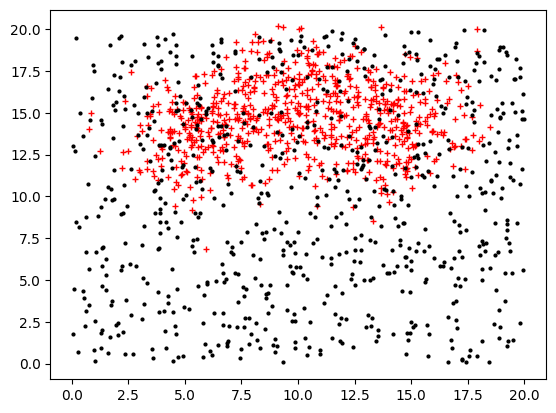

In [85]:
plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)

In [86]:
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [87]:
trainAcc=np.zeros(len(maxDepths))

In [88]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [89]:
testAcc=np.zeros(len(maxDepths))

In [90]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
index=0
for depth in maxDepths:
  clf=tree.DecisionTreeClassifier(max_depth=depth)
  clf=clf.fit(X_train, y_train)
  Y_predTrain=clf.predict(X_train)
  Y_predTest=clf.predict(X_test)
  trainAcc[index]=accuracy_score(y_train, Y_predTrain)# training data
  testAcc[index]=accuracy_score(y_test, Y_predTest)
  index+=1

In [95]:
trainAcc

array([0.7825    , 0.80166667, 0.82416667, 0.83      , 0.84333333,
       0.85666667, 0.8675    , 0.88333333, 0.8975    , 0.95333333,
       0.9825    , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [96]:
testAcc

array([0.77333333, 0.79666667, 0.82666667, 0.82666667, 0.82      ,
       0.82666667, 0.81666667, 0.79666667, 0.79333333, 0.76      ,
       0.74666667, 0.73      , 0.73      , 0.73333333, 0.71666667,
       0.73      , 0.73333333])

In [97]:
import matplotlib.pyplot as plt

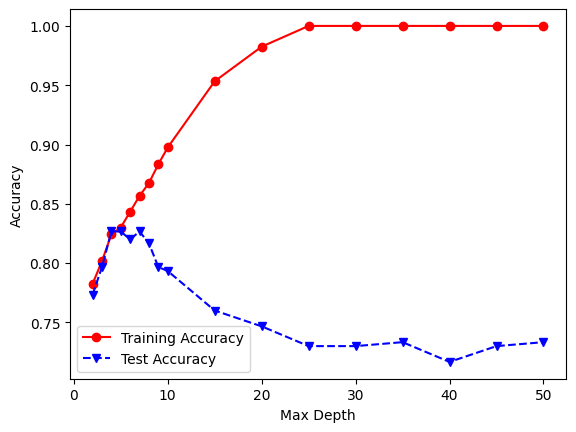

In [98]:
plt.plot(maxDepths, trainAcc, 'ro-', maxDepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()